**Q-3.  
Imagine you have a dataset where you have different categories of data, Now
you need to find the most similar data to the given data by using any 4 different
similarity algorithms. Now you have to build a model which can find the most similar
data to the given data. 
Dataset - This is the Dataset (https://www.kaggle.com/datasets/rmisra/news-category-dataset) You can use this dataset for this question.**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
pd.set_option('display.max_columns', None)
from matplotlib import *
import sys
from pylab import *
import json

import warnings
warnings.filterwarnings('ignore')

In [2]:
#with open('News_Category_Dataset_v3.json') as f: 
#    d = json.load(f)


data = [json.loads(line) for line in open('News_Category_Dataset_v3.json', 'r')]

In [3]:
df = pd.json_normalize(data)

## Basic Info :

In [4]:
df.head(10)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22
6,https://www.huffpost.com/entry/reporter-gets-a...,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS,"""Who's that behind you?"" an anchor for New Yor...",Elyse Wanshel,2022-09-22
7,https://www.huffpost.com/entry/puerto-rico-wat...,Puerto Ricans Desperate For Water After Hurric...,WORLD NEWS,More than half a million people remained witho...,"DÁNICA COTO, AP",2022-09-22
8,https://www.huffpost.com/entry/mija-documentar...,How A New Documentary Captures The Complexity ...,CULTURE & ARTS,"In ""Mija,"" director Isabel Castro combined mus...",Marina Fang,2022-09-22
9,https://www.huffpost.com/entry/biden-un-russia...,Biden At UN To Call Russian War An Affront To ...,WORLD NEWS,White House officials say the crux of the pres...,"Aamer Madhani, AP",2022-09-21


In [5]:
df.shape

(209527, 6)

In [6]:
df.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [7]:
for items in df.columns:
    print(f'No. of {items} values : {len(df[items].value_counts())}')

No. of link values : 209486
No. of headline values : 207996
No. of category values : 42
No. of short_description values : 187022
No. of authors values : 29169
No. of date values : 3890


<AxesSubplot:xlabel='count', ylabel='category'>

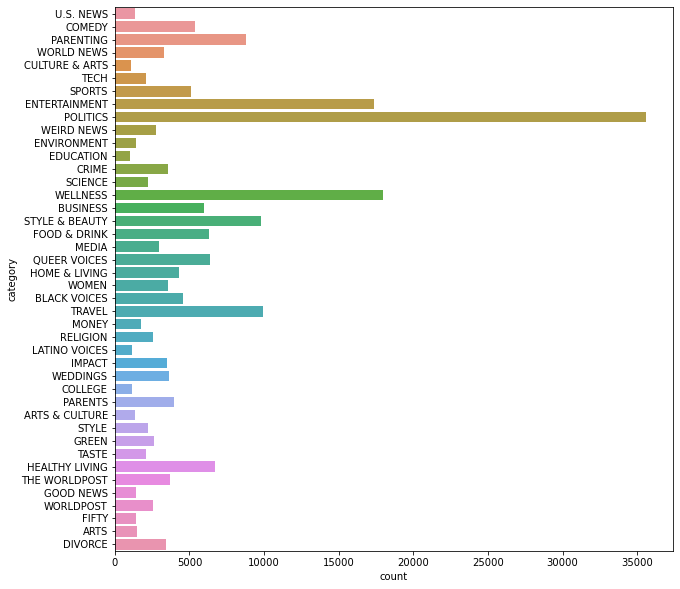

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(y = df['category'])

In this dataset we have no null values. A small exploration shows that majority of data falls under Political category. Then comes Entertainment and Wellness. Then comes Parenting, Style and Beauty, Travel and Healthy Living. 

## Similarity Algorithm : 

One can find the distance between two textual data using several approaches as - Hamming Distance, Cosine Similarity, Euclidean distance, Jaccard Coefficient, Manhattan distance etc. 
In this project we will use only the above mentioned algorithms to find the similarity between texts. 

Now as we are using text data, we need to transform this data into vectos. For that first we need to clean the data (removing stopwords, punctuation, url, emoticons etc) and then vectorize it. We will use TF-IDF/Countvectorizer vectorization and the resultant vectors will be used as input to study the textual similarity. 

In [9]:
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [10]:
def cleaning_process(text1) :
    text = text1
    #print(text)
    if type(text) == str : 
        text = re.sub(r"http\S+", "", text) # removing url
        
        emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
        #print(emoji_pattern.sub(r'', text)) # no emoji
        text = emoji_pattern.sub(r'', text)
        nopunc = [char for char in text if char not in string.punctuation] # removing punctuation
        text = ''.join(nopunc)
        text = ''.join([i for i in text if not i.isdigit()]) # removing digits
        #text = text.lower()
        #tokens = nltk.word_tokenize(text)
        #tokens = [w for w in tokens if w not in stopwords.words('english')]
        
        
        return text
    
    return None

In our given data we have 4 text columns. We will use them all as text input. To do that we will concatenate these colums into one. 

In [11]:
df['fulltext'] = df['headline'] + ' ' + df['category'] + ' ' + df['short_description'] + ' ' + df['authors']
#df['fulltext'] = df['short_description']

In [12]:
df['cleanedtext'] = df['fulltext'].apply(cleaning_process)

In [13]:
df['cleanedtext'][0:10]

0    Over  Million Americans Roll Up Sleeves For Om...
1    American Airlines Flyer Charged Banned For Lif...
2     Of The Funniest Tweets About Cats And Dogs Th...
3    The Funniest Tweets From Parents This Week Sep...
4    Woman Who Called Cops On Black BirdWatcher Los...
5    Cleaner Was Dead In Belk Bathroom For  Days Be...
6    Reporter Gets Adorable Surprise From Her Boyfr...
7    Puerto Ricans Desperate For Water After Hurric...
8    How A New Documentary Captures The Complexity ...
9    Biden At UN To Call Russian War An Affront To ...
Name: cleanedtext, dtype: object

For our further study we will use the 'cleanedtext' columns as input. 

In [14]:
df1 = df[0:500]

In [15]:
df1.head()

,link,headline,category,short_description,authors,date,fulltext,cleanedtext
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,Over Million Americans Roll Up Sleeves For Om...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li...",American Airlines Flyer Charged Banned For Lif...
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...,Of The Funniest Tweets About Cats And Dogs Th...
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...,The Funniest Tweets From Parents This Week Sep...
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...,Woman Who Called Cops On Black BirdWatcher Los...


#### Vectorizing the input text

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
#vects = TfidfVectorizer(stop_words='english')
vects = CountVectorizer(stop_words='english')
text_vect = vects.fit_transform(df1['cleanedtext'])

In [18]:
#vects.vocabulary_
text_vect.shape

(500, 4818)

In [19]:
type(text_vect)

scipy.sparse.csr.csr_matrix

In [20]:
#text_vect_dense = text_vect.todense()

Now we will use 4 different similarity algorithm and find that which algorithm gives the most similar data. 
For Euclidean distance, lesser distance means more similarity. Similar idea goes for cosine similarity, hamming distance and jaccard similarity.  

In [21]:
# Import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import euclidean_distances

In [22]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(text_vect, text_vect)

euclidean_distances_sim = euclidean_distances(text_vect, text_vect)

In [23]:
#Construct a reverse map of indices and headlines 
index_values = pd.Series(df1.index, index=df1['headline']).drop_duplicates()


In [24]:
index_values[0:10]

headline
Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters                 0
American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video    1
23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23)                        2
The Funniest Tweets From Parents This Week (Sept. 17-23)                                     3
Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer                4
Cleaner Was Dead In Belk Bathroom For 4 Days Before Body Found: Police                       5
Reporter Gets Adorable Surprise From Her Boyfriend While Live On TV                          6
Puerto Ricans Desperate For Water After Hurricane Fiona’s Rampage                            7
How A New Documentary Captures The Complexity Of Being A Child Of Immigrants                 8
Biden At UN To Call Russian War An Affront To Body's Charter                                 9
dtype: int64

In [25]:
def get_recommendations(title, sim_algo=cosine_sim, rev = False):
    
    # Get the index of the dataframe that matches the headline
    idx = index_values[title]
    
    # Get the pairwsie similarity scores of all data with that headline
    algo_scores = list(enumerate(sim_algo[idx]))
    
    
    # Sort the data based on the similarity scores
    algo_scores = sorted(algo_scores, key=lambda x: x[1], reverse=rev)
    
        
    
    # Get the scores of the 10 most similar headlines
    algo_scores = algo_scores[1:20]
    
    
    # Get the headline indices
    sim_data_indices = [i[0] for i in algo_scores]
    sim_scores = [i[1] for i in algo_scores]
    

    # Return the top 10 most similar headlines
    return df1[['headline', 'category', 'short_description', 'authors']].iloc[sim_data_indices], sim_scores


In [26]:
txt1 = df1['headline'].iloc[8]
txt1

'How A New Documentary Captures The Complexity Of Being A Child Of Immigrants'

In [27]:
df1['cleanedtext'].iloc[8]

'How A New Documentary Captures The Complexity Of Being A Child Of Immigrants CULTURE  ARTS In Mija director Isabel Castro combined music documentaries with the style of Euphoria and Clueless to tell a more nuanced immigration story Marina Fang'

In [28]:
df1['authors'][8]

'Marina Fang'

In [29]:
df1['category'][8]

'CULTURE & ARTS'

In [30]:
get_recommendations(txt1, cosine_sim, rev = True)


(                                              headline        category  \
 449  'Menudo: Forever Young' Looks At The Exploitat...  CULTURE & ARTS   
 66   'Sidney' Tackles The Not-So-Comfortable Conver...  CULTURE & ARTS   
 16   'Reboot' Is A Clever And Not Too Navel-Gazey L...  CULTURE & ARTS   
 281  What’s Going On With HBO Max? Here’s What We K...  CULTURE & ARTS   
 360  'The Idol' Trailer Stars Lily-Rose Depp In 'Sl...   ENTERTAINMENT   
 391  The Snubs And Surprises Of The 2022 Emmy Nomin...  CULTURE & ARTS   
 45   Meet Alex Aster, The TikToker Changing The Pub...  CULTURE & ARTS   
 484  Twitter Erupts With Opinions After Beyoncé Dr...   ENTERTAINMENT   
 454  How '90s Teen Movies Reflected The Real-Life H...  CULTURE & ARTS   
 127  Lisa Loeb Paved Her Own Way In The '90s — A Ra...  CULTURE & ARTS   
 204  'Mike' And The Flawed Allure Of Authorized Bio...  CULTURE & ARTS   
 65   How Ani Liu Is Brilliantly Disguising Her Art ...  CULTURE & ARTS   
 74   James Cameron Prese

In [31]:
get_recommendations(txt1, euclidean_distances_sim, rev = False)

(                                              headline        category  \
 478           Herschel Walker Says There Are 52 States        POLITICS   
 250  Why The Justice Department Can’t Say More Abou...        POLITICS   
 395  Orange Wine: Everything You Need To Know And P...    FOOD & DRINK   
 179  Teachers In Ohio's Largest School District Go ...        POLITICS   
 389  ‘Galaxy Gazing Is The New Stargazing’: Cosmolo...         SCIENCE   
 2    23 Of The Funniest Tweets About Cats And Dogs ...          COMEDY   
 57   Jean-Luc Godard, Pioneering French Filmmaker, ...   ENTERTAINMENT   
 204  'Mike' And The Flawed Allure Of Authorized Bio...  CULTURE & ARTS   
 272  This Is The Most Underappreciated Part Of The ...        POLITICS   
 476  'Jeopardy!' Makes A Spelling Error And Fans Gl...   ENTERTAINMENT   
 66   'Sidney' Tackles The Not-So-Comfortable Conver...  CULTURE & ARTS   
 95   Fast-Moving Fairview Fire Kills At Least 2 In ...       U.S. NEWS   
 225  Officials: Fire At 

## Comments and Discussion : 

- The original data set contains ~ 21 lakhs of instances. This is a lot of data. For text data we need to transform it into vectors through vectorization process. Now this amount of data lead to memory issue. So, for now we have studied only 500 instances. 



- We all know that TF-IDF works better in text vectorization than CountVectorizer. TF-IDF helps to scan the data and bring out the most signigicant text. In this case, we are trying to find the similar news data, this may not be very helpful. While trying to find out the similar data, giving the headline or the author name or the category as input, we need to have vectors which should not weigh down anything. As an example say, we have lesser amount of data corresponding to Money and Parent. Now if we try to find out similar data, we need to find more and more this kind of data. Tf-IDF will not help in this case. (I have done and seen this. If any doubt you are encouraged to do it and observe.) So, for text vectorization, we use Countvectorizer. 


- In this work we add up all the text columns and make a soup of it, which contains everything. This will help in finding similar texts which will include all the genres. Say, for a topic of given article, it will predict articles from same category or articles written by similar authors etc. 



- The results are above as shown, and we can observe that both the cosine similarity and euclidean distances give good results. If observe keenly, it can be seen that cosine similarity gives better result than euclidean distances. In case of prediction by cosine similarity, similar text, authors and categories were predicted, which is not observed for euclidean distance. 

### Some good reads : 
    

- https://kavita-ganesan.com/news-classifier-with-logistic-regression-in-python/#.ZHclBzrhWUk

- https://medium.com/@krause60/news-article-clustering-using-unsupervised-learning-7647600a04fd

- https://github.com/parkervg/news-article-clustering


- https://www.geeksforgeeks.org/movie-recommender-based-on-plot-summary-using-tf-idf-vectorization-and-cosine-similarity/

- https://www.analyticsvidhya.com/blog/2022/08/movies-recommendation-system-using-python/

- https://a-elkhattam.medium.com/imdb-movie-recommendation-chatbot-942f84dfa0dc

- https://www.analyticsvidhya.com/blog/2022/08/building-a-content-based-recommendation-system/

- https://www.datacamp.com/tutorial/recommender-systems-python

- https://www.datacamp.com/tutorial/recommender-systems-python

- https://medium.com/fnplus/evaluating-recommender-systems-with-python-code-ae0c370c90be

- https://www.analyticsvidhya.com/blog/2021/02/a-simple-guide-to-metrics-for-calculating-string-similarity/

- https://medium.com/msackiit/what-is-text-similarity-and-how-to-implement-it-c74c8b641883 

- https://www.baeldung.com/cs/ml-similarities-in-text

In [32]:
# https://stackoverflow.com/questions/46427362/jaccard-similarity-for-texts-in-a-pandas-dataframe
# https://stackoverflow.com/questions/37003272/how-to-compute-jaccard-similarity-from-a-pandas-dataframe
# https://stackoverflow.com/questions/46975929/how-can-i-calculate-the-jaccard-similarity-of-two-lists-containing-strings-in-py
# http://billchambers.me/tutorials/2014/12/21/tf-idf-explained-in-python.html